<p><font size="6" color='grey'> <b>
Machine Learning
</b></font> </br></p>
<p><font size="5" color='grey'> <b>
Supervised Learning - Decision Tree - IBM Analytics Employee Attrition
</b></font> </br></p>

---


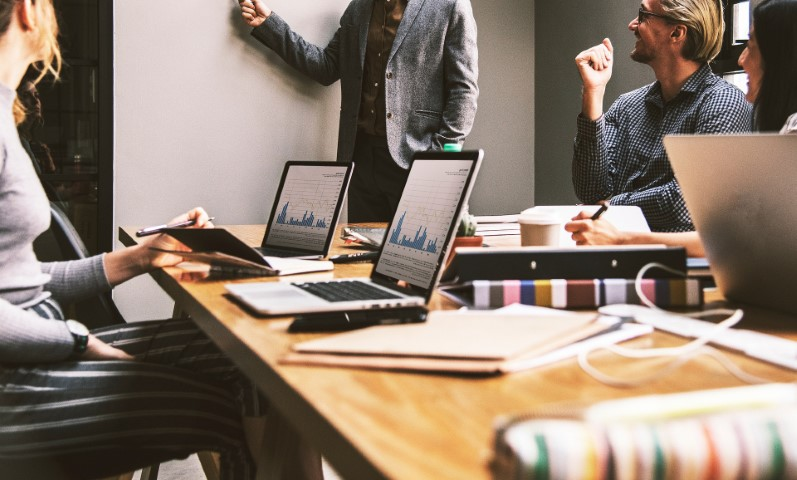

Bild von <a href="https://pixabay.com/de/users/ronaldcandonga-17383039/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=5382501">Ronald Carreño</a> auf <a href="https://pixabay.com/de//?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=5382501">Pixabay</a>

# **1 <font color='orange'>|</font> Understand**
---



<p><font color='black' size="5">
Warnungen ausstellen
</font></p>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

<p><font color='black' size="5">
Anwendungsfall
</font></p>

Prognostizieren Sie die Fluktuation Ihrer wertvollen Mitarbeiter. Entdecken Sie die Faktoren, die zur Mitarbeiterabwanderung führen, und gehen Sie wichtigen Fragen nach, wie z. B. „Zeigen Sie mir eine Aufschlüsselung der Entfernung von zu Hause nach beruflicher Rolle und Abgang“ oder „Vergleichen Sie das durchschnittliche monatliche Einkommen nach Bildung und Abgang“. Dies ist ein fiktiver Datensatz, der von IBM Data Scientists erstellt wurde.


[DataSet](https://www.openml.org/search?type=data&status=active&id=43896)

[Info](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)


In [ ]:
import pandas as pd
from sklearn.datasets import fetch_openml
df = fetch_openml(parser='auto', target_column='default-target',data_id=43896)

In [ ]:
data = df.data[['MonthlyIncome', 'Age', 'HourlyRate', 'OverTime', 'YearsAtCompany', 'DistanceFromHome', 'Education']].copy()
target = df.target.copy()

<p><font color='black' size="5">
EDA (Explorative Data Analysis) mit Pandas
</font></p>


In [ ]:
data

In [ ]:
data.dtypes

In [ ]:
data.describe().T

In [ ]:
pd.DataFrame(target).value_counts()

In [ ]:
data.corr()

In [ ]:
target.value_counts()

# **2 <font color='orange'>|</font> Prepare**

---

<p><font color='black' size="5">
Datentyp ermitteln
</font></p>

In [ ]:
all_col = data.columns
num_col = data.select_dtypes(include='number').columns
cat_col = data.select_dtypes(exclude='number').columns

<p><font color='black' size="5">
Codierung
</font></p>


In [ ]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
data[cat_col] = OrdinalEncoder().fit_transform(data[cat_col])
target = LabelEncoder().fit_transform(target)                       # notwendig für dtreeviz

<p><font color='black' size="5">
Upsampling
</font></p>

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
data, target = ros.fit_resample(data, target)

In [ ]:
data.shape, target.shape

<p><font color='black' size="5">
Anpassung Datentyp
</font></p>

In [ ]:
target.replace(['No', 'Yes'], [0,1], inplace=True)
target = target.astype(int)

# **3 <font color='orange'>|</font> Modeling**
---



<p><font color='black' size="5">
Train-Test-Set
</font></p>


In [ ]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.20, random_state=42, stratify=target)
data_train.shape, data_test.shape, target_train.shape, target_test.shape

 <p><font color='black' size="5">
Modellauswahl & Training
</font></p>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=7)
model.fit(data_train, target_train)

# **4 <font color='orange'>|</font> Evaluate**
---


<p><font color='black' size="5">
Prognose
</font></p>

In [ ]:
target_train_pred = model.predict(data_train)
target_test_pred = model.predict(data_test)

<p><font color='black' size="5">
Accuracy
</font></p>

In [ ]:
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(target_train, target_train_pred) * 100
print (f"Modell: {model} -- Train -- Accuracy: {acc_train:5.2f}")

In [ ]:
acc_test = accuracy_score(target_test, target_test_pred) * 100
print (f"Modell: {model} -- Test -- Accuracy: {acc_test:5.2f}")

<p><font color='black' size="5">
Confusion Matrix
</font></p>

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
conf_matrix = confusion_matrix(target_test, target_test_pred)
display_labels_= ['No','Yes']
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=display_labels_)
disp.plot(cmap='Blues')

In [ ]:
print(classification_report(target_test, target_test_pred, target_names=display_labels_))

<p><font color='black' size="5">
Aufbau Analysewürfel
</font></p>

In [ ]:
# Übernahme der Testdaten
cube = data_test.copy()
cube.reset_index(inplace=True)

# Übernahem Target real & predict
cube['real'] = pd.DataFrame(target_test, columns=['real'])
cube['predict'] = pd.DataFrame(target_test_pred, columns=['predict'])

<p><font color='black' size="5">
Darstellen des Entscheidungsbaums
</font></p>

Als Text

In [ ]:
from sklearn import tree
text_representation = tree.export_text(model, feature_names=list(data.columns))
print(text_representation)

Als Grafik mit graphviz

In [ ]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=data.columns,
                                class_names=['No', 'Yes'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

Als Grafik mit dtreeviz

In [ ]:
%%capture
try:
  import dtreeviz
except:
  !pip install -q dtreeviz
  import dtreeviz

In [ ]:
viz_model = dtreeviz.model(model, data , target,
                target_name="target",
                class_names=['No', 'Yes'],
                feature_names=data.columns)

In [ ]:
tree_img = viz_model.view(scale=0.8, fontname='Monospace')

In [ ]:
tree_img

In [ ]:
tree_img_lr = viz_model.view(orientation="LR", fontname='Monospace')

In [ ]:
tree_img_lr

In [ ]:
# local Explanation
one = data_test.iloc[13]
viz_model.view(x=one, fontname='Monospace')

In [ ]:
# local Explanation
viz_model.view(x=one, show_just_path=True, fontname='Monospace')

In [ ]:
tree_img = viz_model.view(scale=0.8, fontname='Monospace')
tree_img.save('tree.svg')

# **5 <font color='orange'>|</font> Deploy**
---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Modellexport und -speicherung</br>
✅ Abhängigkeiten und Umgebung</br>
✅ Sicherheit und Datenschutz</br>
✅ In die Produktion integrieren</br>
✅ Tests und Validierung</br>
✅ Dokumentation & Wartung</br>